In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data =  pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
data.dropna(inplace=True)#we are using this as there are missing values in the total_bedroom so we are equalizing by removing the missing amount from all the other variables with the help of the dropna and inplace = true helps them to keep in place

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [34]:
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [35]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [36]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [48]:
train_data = X_train.join(y_train)#we have joined the x_train and y_train
z = train_data.drop(['ocean_proximity'],axis = 1)
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15953,-122.44,37.72,52.0,1380.0,272.0,847.0,284.0,3.7143,260000.0
18184,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,311600.0
20269,-119.18,34.20,21.0,494.0,127.0,489.0,106.0,2.6964,170800.0
581,-122.07,37.72,26.0,3204.0,477.0,1411.0,484.0,5.4834,295200.0
15046,-116.90,32.77,8.0,3600.0,492.0,1421.0,482.0,6.2609,307100.0
...,...,...,...,...,...,...,...,...,...
1599,-122.12,37.88,35.0,2785.0,362.0,1001.0,363.0,8.0448,433300.0
9287,-122.55,38.07,38.0,3392.0,709.0,1894.0,713.0,3.0573,350800.0
18995,-121.94,38.41,15.0,1263.0,211.0,665.0,208.0,4.5000,260900.0
14349,-117.21,32.75,15.0,1716.0,702.0,914.0,672.0,1.0612,300000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

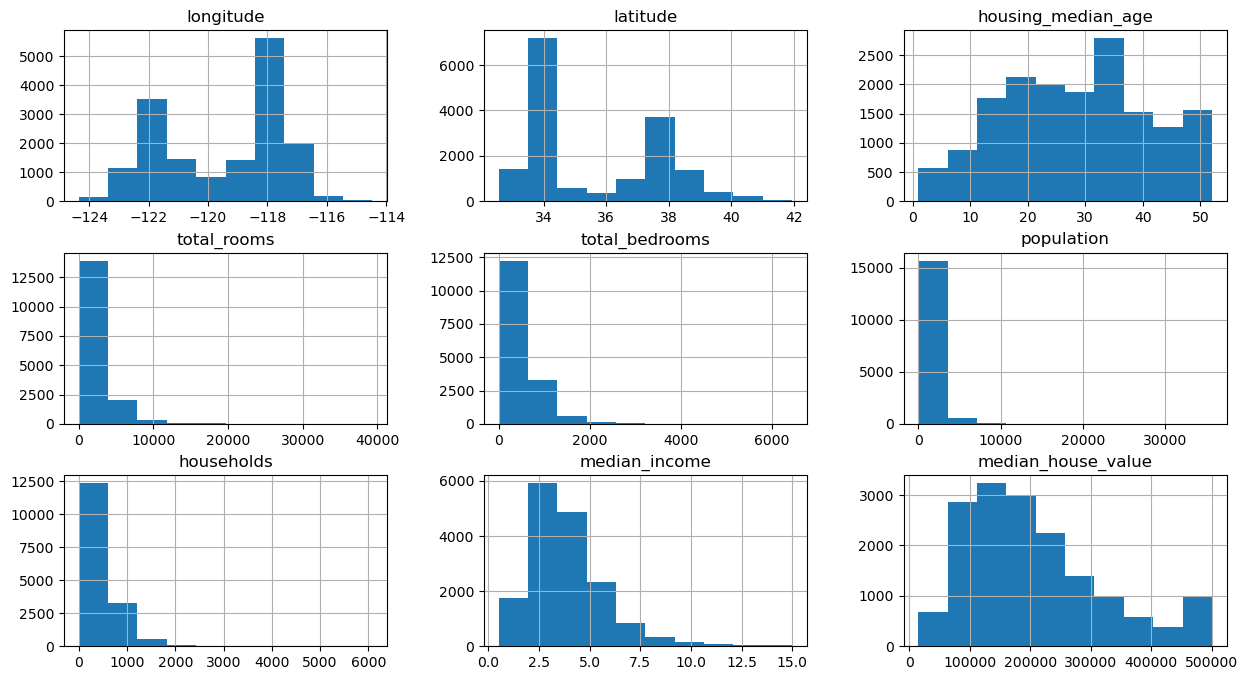

In [41]:
train_data.hist(figsize=(15,8))#hist gives us the train_data in the form of a histogram

In [49]:
z.corr()#A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925643,-0.105762,0.041299,0.065772,0.098502,0.054066,-0.019311,-0.046720
latitude,-0.925643,1.000000,0.009957,-0.031280,-0.062064,-0.104492,-0.067126,-0.075031,-0.141448
housing_median_age,-0.105762,0.009957,1.000000,-0.359837,-0.322235,-0.295004,-0.305563,-0.113688,0.107654
total_rooms,0.041299,-0.031280,-0.359837,1.000000,0.931774,0.861844,0.921950,0.197101,0.132105
total_bedrooms,0.065772,-0.062064,-0.322235,0.931774,1.000000,0.882045,0.981634,-0.005559,0.049299
population,0.098502,-0.104492,-0.295004,0.861844,0.882045,1.000000,0.909881,0.003324,-0.027129
households,0.054066,-0.067126,-0.305563,0.921950,0.981634,0.909881,1.000000,0.014318,0.063065
median_income,-0.019311,-0.075031,-0.113688,0.197101,-0.005559,0.003324,0.014318,1.000000,0.689160
median_house_value,-0.046720,-0.141448,0.107654,0.132105,0.049299,-0.027129,0.063065,0.689160,1.000000


<Axes: >

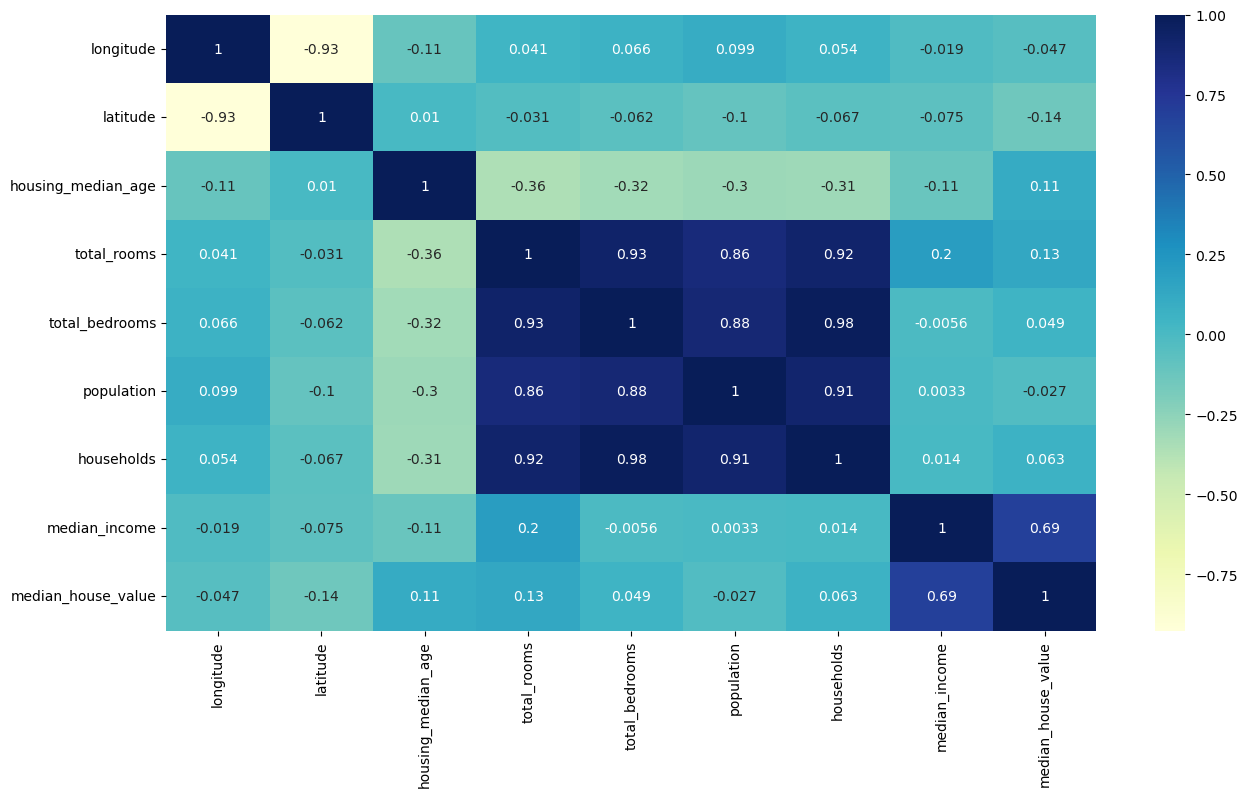

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(z.corr() , annot=True , cmap= "YlGnBu" )